# Goodwin Oscillator
Group 2: Zhao, Saul, Manoj, Jayson

Genetic circuits that oscillate with a period of approximately 24 hours are widespread across different species. The details of the oscillators vary considerably between species, but the ones have been characterized rely on some for of negative auto-regulation. The number of molecules involved in these oscillations also varies greatly between species.
One of the most influential models of circadian clocks is the Goodwin Oscillator. It takes
the form

$$\frac{dX}{dt}= \alpha_1\frac{K^N}{K^N+Z^N}-\gamma_1 X$$

$$\frac{dY}{dt} = \alpha_2X - \gamma_2Y$$

$$\frac{dZ}{dt} = \alpha_3Y - \gamma_3X$$

(a) Implement a stochastic simulation corresponding to the system above using the Gillespie Algorithm. You may need to adjust the rates to get oscillations, and keep the number of molecules at a reasonable level (more than 10 or so, and less than a few hundred).

(b) Change the Hill coefficient, n to a value smaller than 8. What happens to the oscillations? Send a message to Group 1 to see what they observed, and compare notes.

(c) Compare the frequency of oscillations with those obtained by Group 1.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.integrate

In [8]:


def ssa(x,N,T):
    #molecule count    x=[A,rA,B,rB]
    #initialize the time and state
    t_x=[0]            #reaction time
    i=0
    
    #reaction stochiometetry
    v=np.array([[1,0,0],[-1,0,0],[0,1,0,],[0,-1,0],[0,0,1],[0,0,-1]])
    
    while t_x[i]<T:
        
        #calculate the rate for each reaction
        hill=(K**N)/(K**N+x[i,2]**N)
        a=np.array([a1*hill,gamma1*x[i,0],a2*x[i,0],gamma2*x[i,1],a3*x[i,1],gamma3*x[i,2]])
        
        #sum these rate
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        
        #sample time to the next reaction
        epsilon=np.random.uniform(0,1,2)
        
        #compare the probability with the multinomial distribution
        #select the next reaction to fire
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a)) 
        tau=(np.log(1/epsilon[1]))/sum_a
        
        #update the current time and state
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        t_x=np.append(t_x,[t_x[i]+tau])   
        i+=1

    return x,t_x

def plot_trajectory(x,N,t):
    f,axes=plt.subplots(3,1,figsize=(6,4))
    col=['C0','C1','C2']
    tag=['X','Y','Z']
    for i in range(3):
        axes[i].plot(t,x[:,i],c=col[i])
        axes[i].set_xticklabels([])
        axes[i].set_xticks(np.linspace(0,T,5))
        axes[i].set_ylabel(tag[i])
    axes[2].set_xticklabels(np.linspace(0,T,5))
    axes[2].set_xlabel('time (sec)')
    plt.suptitle('N=%d' %(N),y=1.01)
    plt.tight_layout(h_pad=-0.2, w_pad=3)
    plt.legend(['X','Y','Z'],loc='upper left')

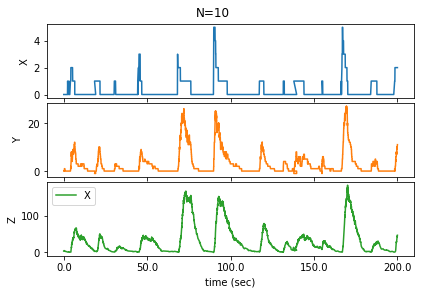

In [28]:
a1=a2=a3=5
gamma1=gamma2=gamma3=0.5
K=1
N=10
T=200
x,t=ssa(np.array([[0.01,0.1,4]]),N,T)
plot_trajectory(x,N,t)

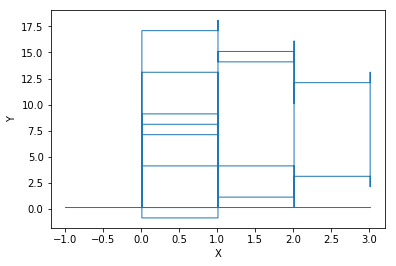

In [10]:
#Plot phase-diagram
plt.plot(x[:,0], x[:,1], linewidth=1)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

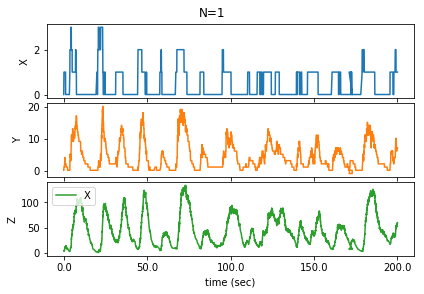

In [31]:
a1=a2=a3=5
gamma1=gamma2=gamma3=0.5
K=1
N=1
T =200
x,t=ssa(np.array([[0.01,0.1,4]]),N,T)
plot_trajectory(x,N,t)

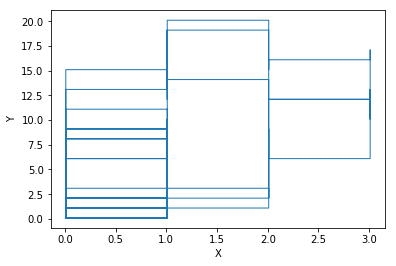

In [12]:
#Plot phase-diagram
plt.plot(x[:,0], x[:,1], linewidth=1)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

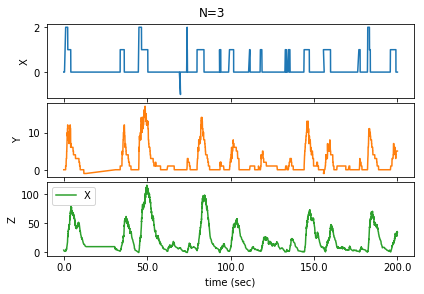

In [22]:
a1=a2=a3=5
gamma1=gamma2=gamma3=0.5
K=1
N=3
T = 200
x,t=ssa(np.array([[0.01,0.1,4]]),N,T)
plot_trajectory(x,N,t)

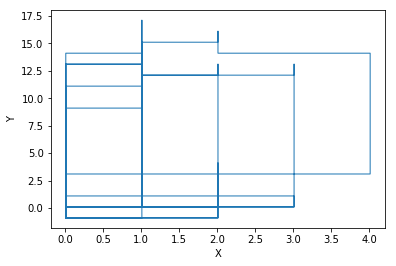

In [14]:
#Plot phase-diagram
plt.plot(x[:,0], x[:,1], linewidth=1)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

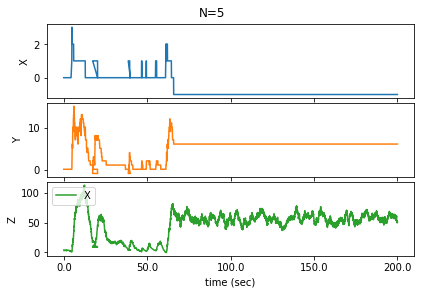

In [23]:
a1=a2=a3=5
gamma1=gamma2=gamma3=0.5
K=1
N=5
T = 200
x,t=ssa(np.array([[0.01,0.1,4]]),N,T)
plot_trajectory(x,N,t)

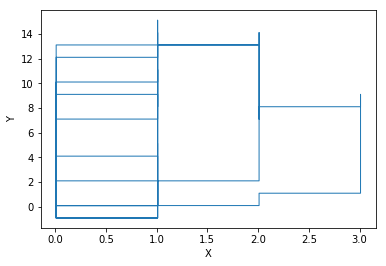

In [16]:
#Plot phase-diagram
plt.plot(x[:,0], x[:,1], linewidth=1)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

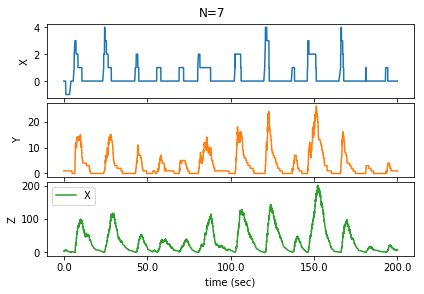

In [24]:
a1=a2=a3=5
gamma1=gamma2=gamma3=0.5
K=1
N=7
T=200
x,t=ssa(np.array([[0.01,1,4]]),N,T)
plot_trajectory(x,N,t)

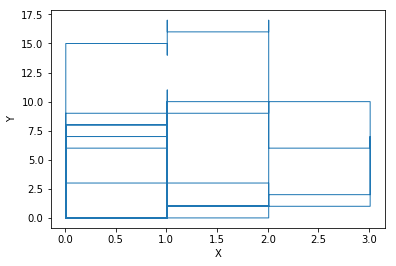

In [18]:
#Plot phase-diagram
plt.plot(x[:,0], x[:,1], linewidth=1)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()